In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
advertisingdf = pd.read_csv('advertising.csv')
advertisingdf.head()
advertisingdf.columns = ['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage', 'AdTopicLine', 'City', 'Male', 'Country','Timestamp', 'ClickedonAd']

In [3]:
advertisingdf['ClickedonAd'].value_counts()

1    500
0    500
Name: ClickedonAd, dtype: int64

In [4]:
advertisingdf[(advertisingdf['ClickedonAd'].isna() == False)].head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 03:36,0


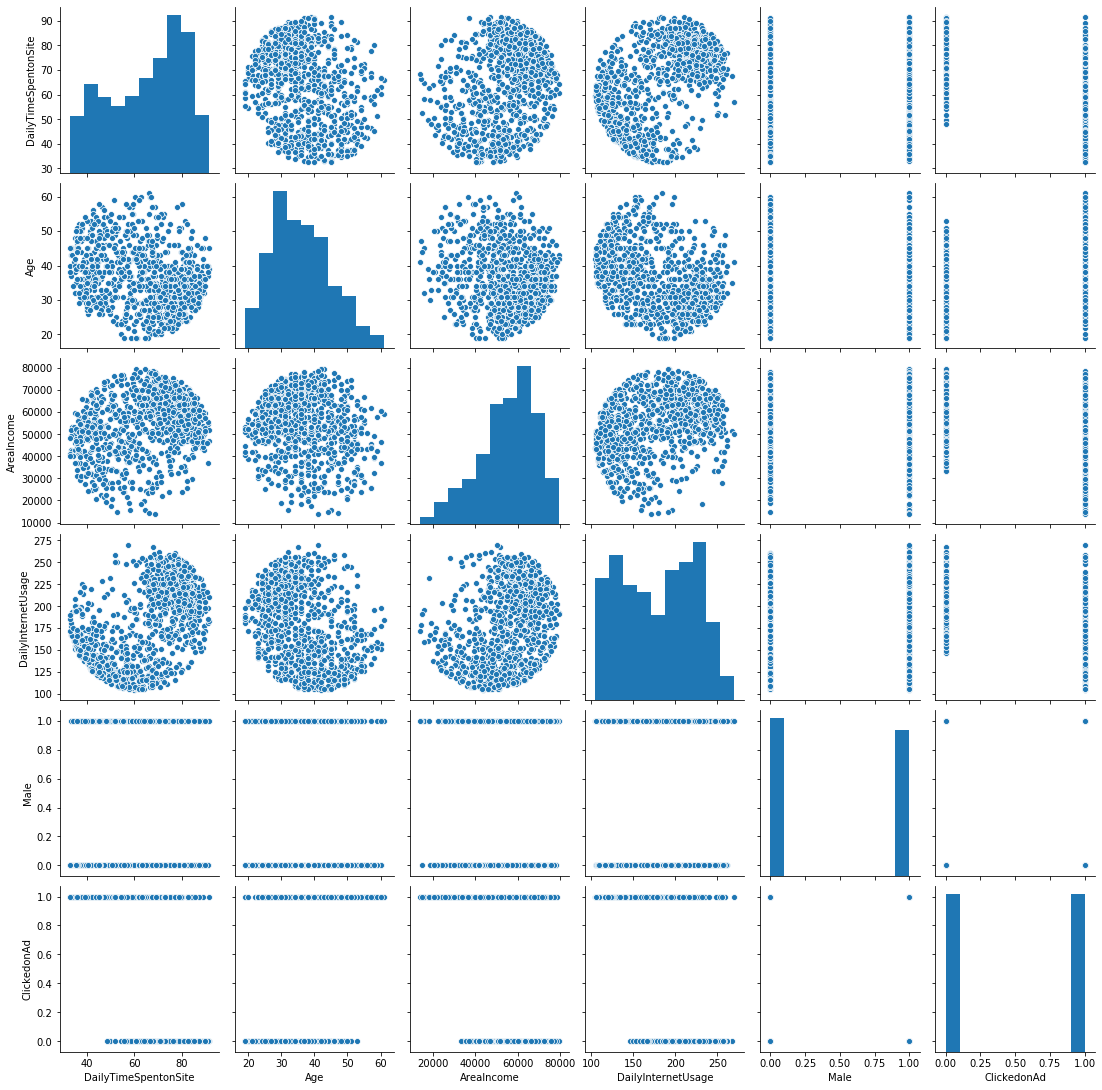

In [5]:
sns.pairplot(data=advertisingdf)

In [6]:
advertisingdf.columns = ['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage', 'AdTopicLine', 'City', 'Male', 'Country',
'Timestamp', 'ClickedonAd']

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [8]:
advertisingdf.drop('City', inplace=  True, axis = 1)

In [9]:
advertisingdf.drop(['Timestamp','Country','AdTopicLine'], axis = 1,inplace=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(advertisingdf.drop('ClickedonAd', axis = 1), advertisingdf['ClickedonAd'], test_size=0.25)

In [11]:
clickedonlogmodel = LogisticRegression()
clickedonlogmodel.fit(X_train, y_train)
clickonadpredicted = clickedonlogmodel.predict(X_test)

#Customer Churn 
clickedonadpredictedprob = clickedonlogmodel.predict_proba (X_test)

In [12]:
compareoutput = pd.DataFrame([clickonadpredicted, y_test, clickedonadpredictedprob[:, 1]]).T
compareoutput.columns = ['Predicted', 'ActualValue', 'PredictedProbabity']
compareoutput.head()

,Predicted,ActualValue,PredictedProbabity
0,1.0,1.0,0.988218
1,1.0,1.0,0.892016
2,1.0,1.0,0.747995
3,1.0,1.0,0.522528
4,1.0,1.0,0.996295


In [13]:
compareoutput.head()

,Predicted,ActualValue,PredictedProbabity
0,1.0,1.0,0.988218
1,1.0,1.0,0.892016
2,1.0,1.0,0.747995
3,1.0,1.0,0.522528
4,1.0,1.0,0.996295


In [14]:
import numpy as np

In [15]:
tprarr = []
fprarr = []
type(tprarr)

list

In [16]:
listthresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
i = 1 
for thresholdval in listthresh:
  compareoutput[thresholdval] = compareoutput['PredictedProbabity'].apply(lambda x : 1 if x > thresholdval else 0)
  tp = compareoutput[(compareoutput['ActualValue'] == 1) & (compareoutput[thresholdval] == 1)][thresholdval].count()
  fn = compareoutput[(compareoutput['ActualValue'] == 1) & (compareoutput[thresholdval] == 0)][thresholdval].count()
  fp = compareoutput[(compareoutput['ActualValue'] == 0) & (compareoutput[thresholdval] == 1)][thresholdval].count()
  tn = compareoutput[(compareoutput['ActualValue'] == 0) & (compareoutput[thresholdval] == 0)][thresholdval].count()
  tpr = tp/(tp + fn)
  fpr = fp/(fp + tn)
  tprarr.append(tpr)
  fprarr.append(fpr)
  print(thresholdval, tpr, fpr)
  #tpr = TP/(TP+FN)
#fpr = FP/(FP+TN)

0.1 0.9621212121212122 0.3220338983050847
0.2 0.9318181818181818 0.211864406779661
0.3 0.9166666666666666 0.1440677966101695
0.4 0.8863636363636364 0.1271186440677966
0.5 0.8333333333333334 0.1016949152542373
0.6 0.803030303030303 0.059322033898305086
0.7 0.7878787878787878 0.03389830508474576
0.8 0.7575757575757576 0.01694915254237288
0.9 0.6666666666666666 0.0


In [17]:
import matplotlib.pyplot as plt

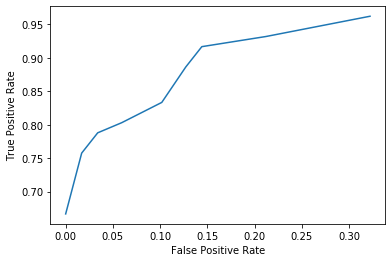

In [18]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fprarr, tprarr)

In [19]:
compareoutput[compareoutput['Predicted'] == compareoutput['ActualValue']].count()/250

Predicted             0.864
ActualValue           0.864
PredictedProbabity    0.864
0.1                   0.864
0.2                   0.864
0.3                   0.864
0.4                   0.864
0.5                   0.864
0.6                   0.864
0.7                   0.864
0.8                   0.864
0.9                   0.864
dtype: float64

In [20]:
print(accuracy_score(clickonadpredicted, y_test))
print(confusion_matrix(clickonadpredicted, y_test))
print(classification_report(clickonadpredicted, y_test))

0.864
[[106  22]
 [ 12 110]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       128
           1       0.83      0.90      0.87       122

    accuracy                           0.86       250
   macro avg       0.87      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



In [21]:
confusion_matrix(clickonadpredicted, y_test)

array([[106,  22],
       [ 12, 110]], dtype=int64)

In [22]:
compareoutput[(compareoutput['ActualValue'] == 0) & (compareoutput['Predicted'] == 0)].count()

Predicted             106
ActualValue           106
PredictedProbabity    106
0.1                   106
0.2                   106
0.3                   106
0.4                   106
0.5                   106
0.6                   106
0.7                   106
0.8                   106
0.9                   106
dtype: int64

In [23]:
advertisingdf.head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,ClickedonAd
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [25]:
dectreemodelclass = DecisionTreeClassifier()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(advertisingdf.drop('ClickedonAd', axis = 1), advertisingdf['ClickedonAd'], test_size=0.25)
dectreemodelclass.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dectreepred = dectreemodelclass.predict(X_test)
dectreepred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [28]:
print(accuracy_score(dectreepred, y_test))
print(confusion_matrix(dectreepred, y_test))
print(classification_report(dectreepred, y_test))

0.952
[[118   6]
 [  6 120]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       124
           1       0.95      0.95      0.95       126

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [32]:
import os
print(os.environ["PATH"]) 
print(os.pathsep)

C:\Program Files (x86)\Graphviz2.38\bin;C:\Anaconda;C:\Anaconda\Library\mingw-w64\bin;C:\Anaconda\Library\usr\bin;C:\Anaconda\Library\bin;C:\Anaconda\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Microsoft SDKs\Azure\CLI2\wbin;C:\oraclexe\app\oracle\product\11.2.0\server\bin;C:\Program Files\Microsoft MPI\Bin\;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0\;C:\windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\Microsoft SQL Server\Client SDK\ODBC\130\Tools\Binn\;C:\Program Files (x86)\Microsoft SQL Server\140\Tools\Binn\;C:\Program Files\Microsoft SQL Server\140\Tools\Binn\;C:\Program Files\Microsoft SQL Server\140\DTS\Binn\;C:\Program Files (x86)\Microsoft SQL Server\150\DTS\Binn\;C:\Program Files (x86)\Microsoft SQL Server\140\DTS\Binn\;C:\Program Files (x86)\PuTTY\;C:\Program Files\nodejs\;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem

In [33]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\WinGraphviz'
os.environ["PATH"] += os.pathsep + 'C:\Anaconda\Lib\site-packages'
os.environ["PATH"] += os.pathsep + 'c:\anaconda\lib\site-packages'
os.environ["PATH"] += os.pathsep + 'c:\anaconda\lib\site-packages'
os.environ["PATH"] += os.pathsep + 'C:\3.DataScience\Data Science Training'
os.environ["PATH"] += os.pathsep + 'C:\3.DataScience\Data Science Training\Lecture 6 Logistic Regression'
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38'
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import pydotplus

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [35]:
features = X_train.columns
features

Index(['DailyTimeSpentonSite', 'Age', 'AreaIncome', 'DailyInternetUsage',
       'Male'],
      dtype='object')

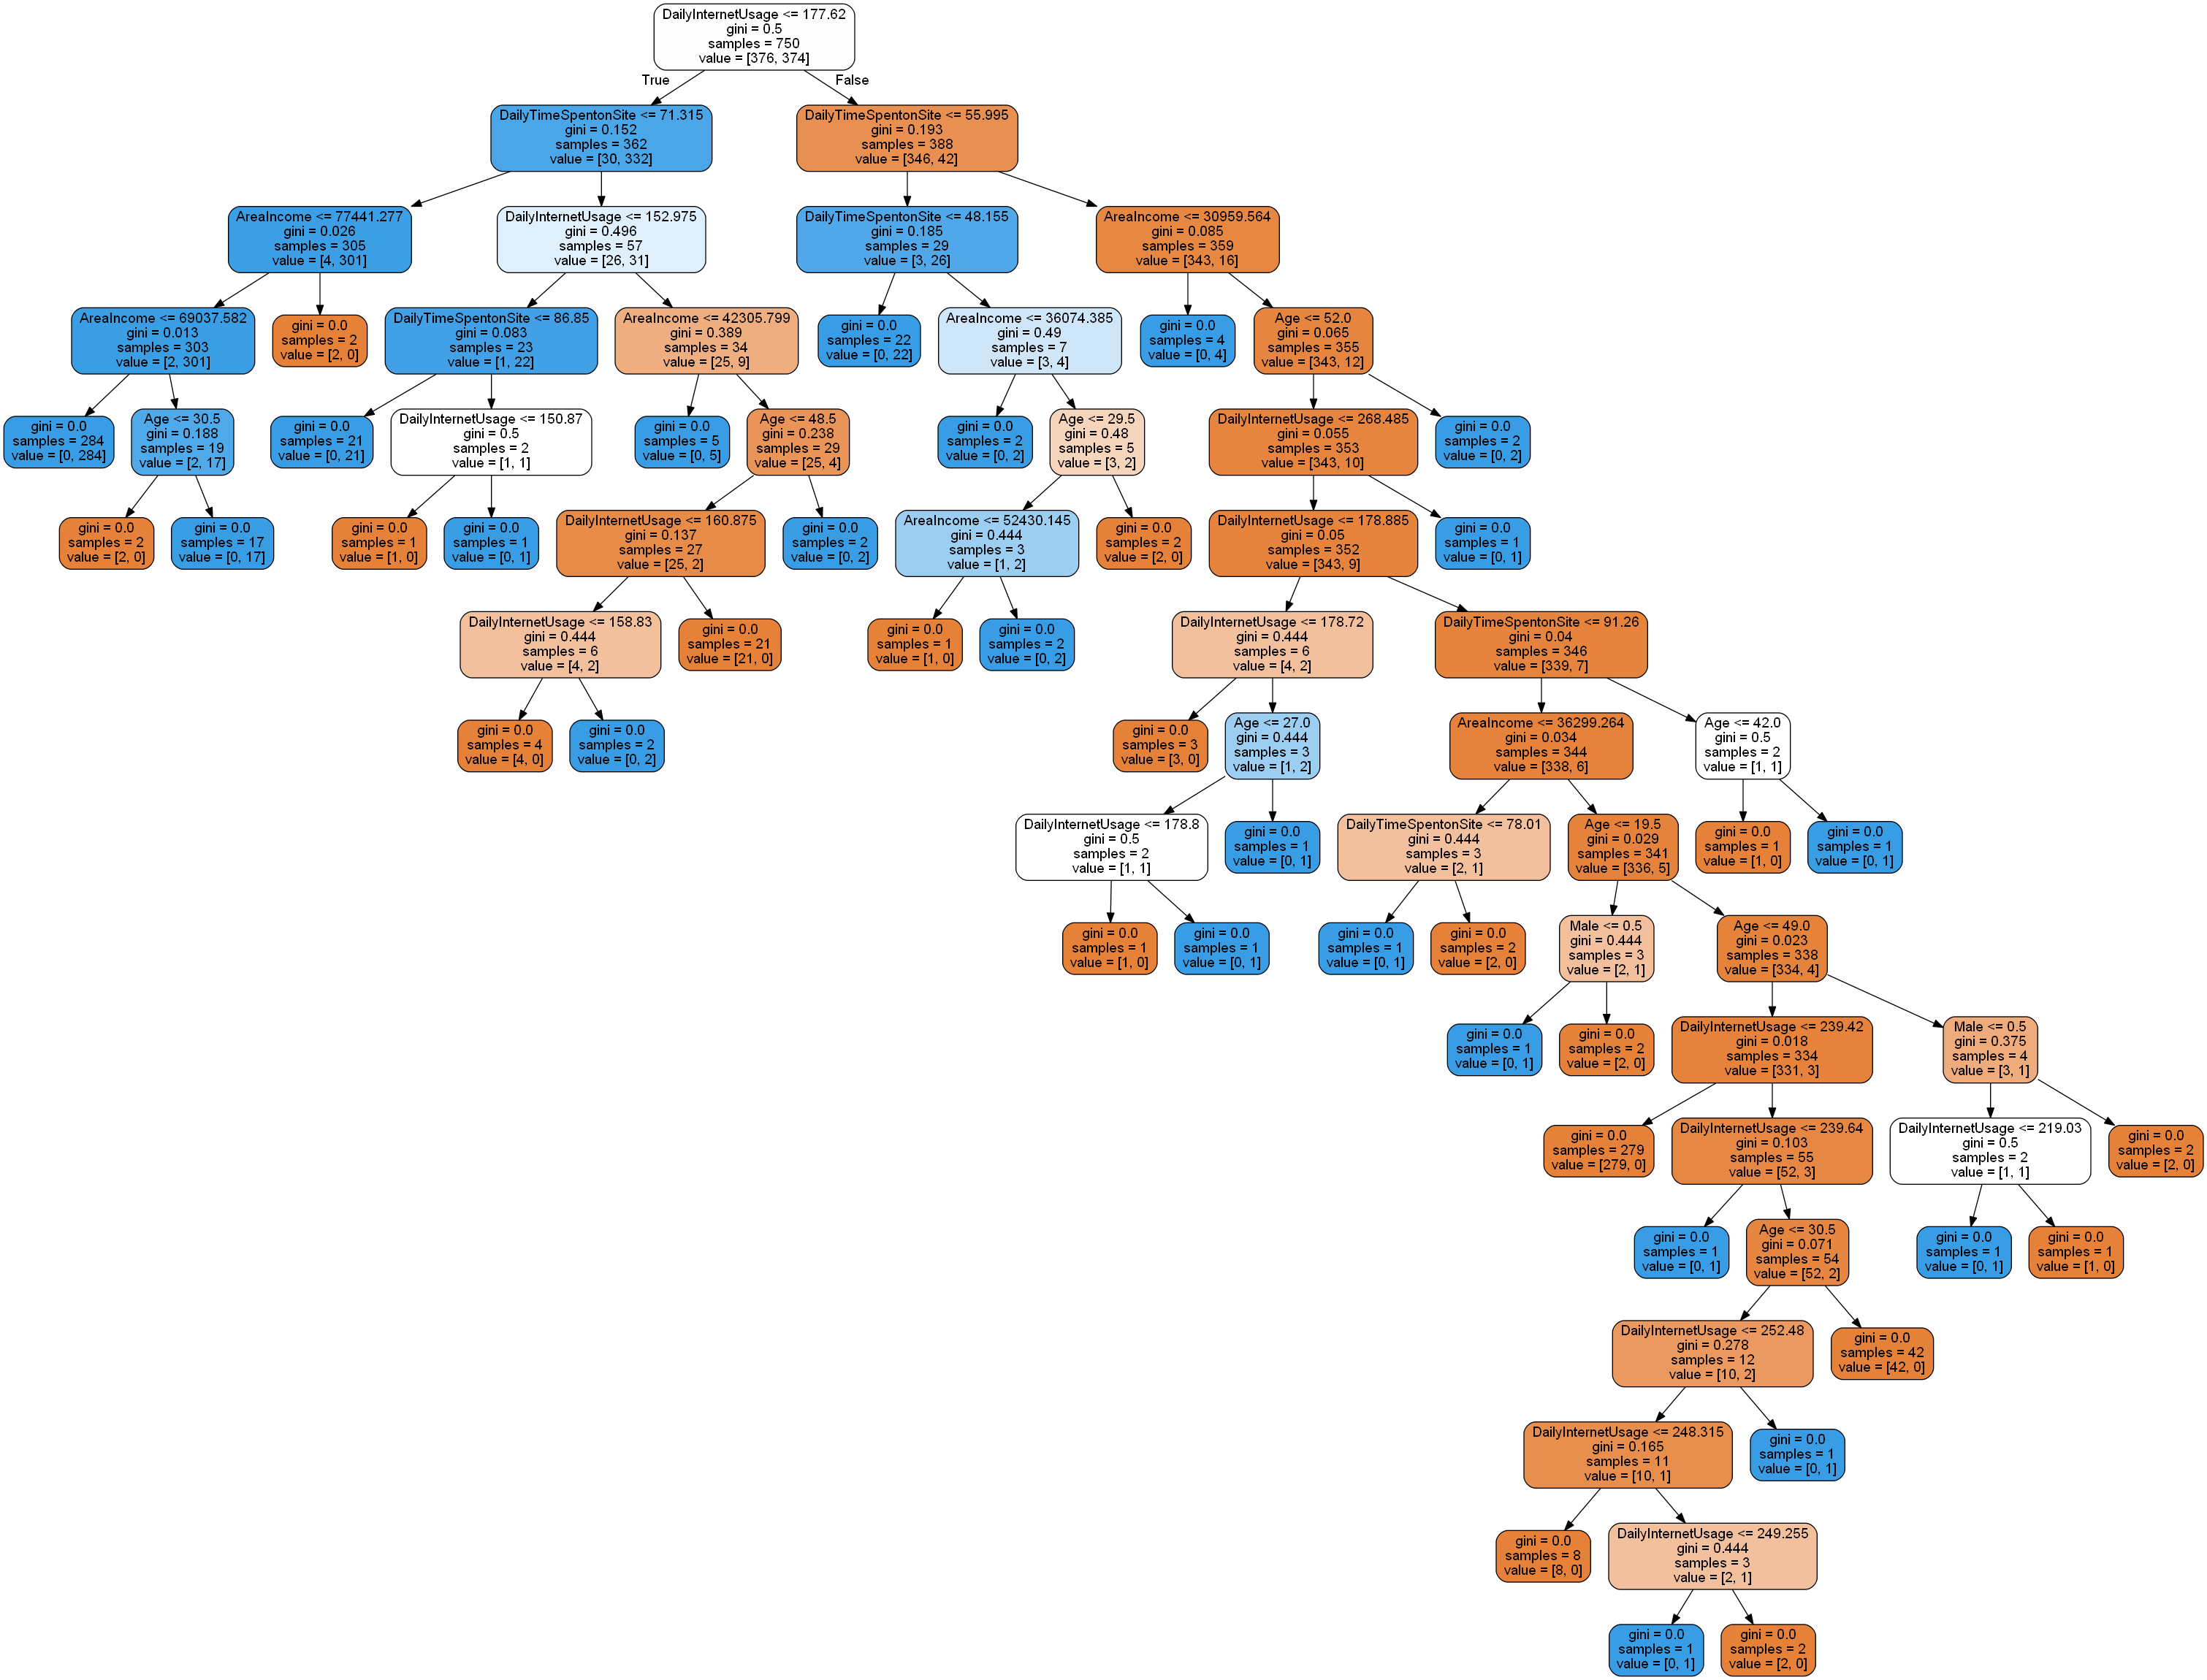

In [36]:
out_file = export_graphviz(
    dectreemodelclass,
    feature_names   = features,
#    class_names     = ['[y=0]', '[y=1]'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph2 = pydotplus.graph_from_dot_data(out_file)
Image(graph2.create_png())

In [37]:
dot_data = StringIO()  
export_graphviz(dectreemodelclass, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [38]:
print(dot_data)
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="DailyInternetUsage <= 177.62\ngini = 0.5\nsamples = 750\nvalue = [376, 374]", fillcolor="#fffefe"] ;
1 [label="DailyTimeSpentonSite <= 71.315\ngini = 0.152\nsamples = 362\nvalue = [30, 332]", fillcolor="#4ba6e7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="AreaIncome <= 77441.277\ngini = 0.026\nsamples = 305\nvalue = [4, 301]", fillcolor="#3c9ee5"] ;
1 -> 2 ;
3 [label="AreaIncome <= 69037.582\ngini = 0.013\nsamples = 303\nvalue = [2, 301]", fillcolor="#3a9ee5"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 284\nvalue = [0, 284]", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="Age <= 30.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]", fillcolor="#50a9e8"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]", fillcolor="#e58139"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 17\nvalue = [0, 17]", fillcolor="#399de5"] ;
5 -> 7 ;
8 

In [39]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
print(graph)
print(type(graph))
print(len(graph))
print(graph[0])

<class 'list'>
1
digraph Tree {
node [color="black", fontname=helvetica, shape=box, style="filled, rounded"];
edge [fontname=helvetica];
0 [fillcolor="#fffefe", label="DailyInternetUsage <= 177.62\ngini = 0.5\nsamples = 750\nvalue = [376, 374]"];
1 [fillcolor="#4ba6e7", label="DailyTimeSpentonSite <= 71.315\ngini = 0.152\nsamples = 362\nvalue = [30, 332]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [fillcolor="#3c9ee5", label="AreaIncome <= 77441.277\ngini = 0.026\nsamples = 305\nvalue = [4, 301]"];
1 -> 2;
3 [fillcolor="#3a9ee5", label="AreaIncome <= 69037.582\ngini = 0.013\nsamples = 303\nvalue = [2, 301]"];
2 -> 3;
4 [fillcolor="#399de5", label="gini = 0.0\nsamples = 284\nvalue = [0, 284]"];
3 -> 4;
5 [fillcolor="#50a9e8", label="Age <= 30.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]"];
3 -> 5;
6 [fillcolor="#e58139", label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"];
5 -> 6;
7 [fillcolor="#399de5", label="gini = 0.0\nsamples = 17\nvalue = [0, 17]"];
5 -> 7;

In [40]:
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

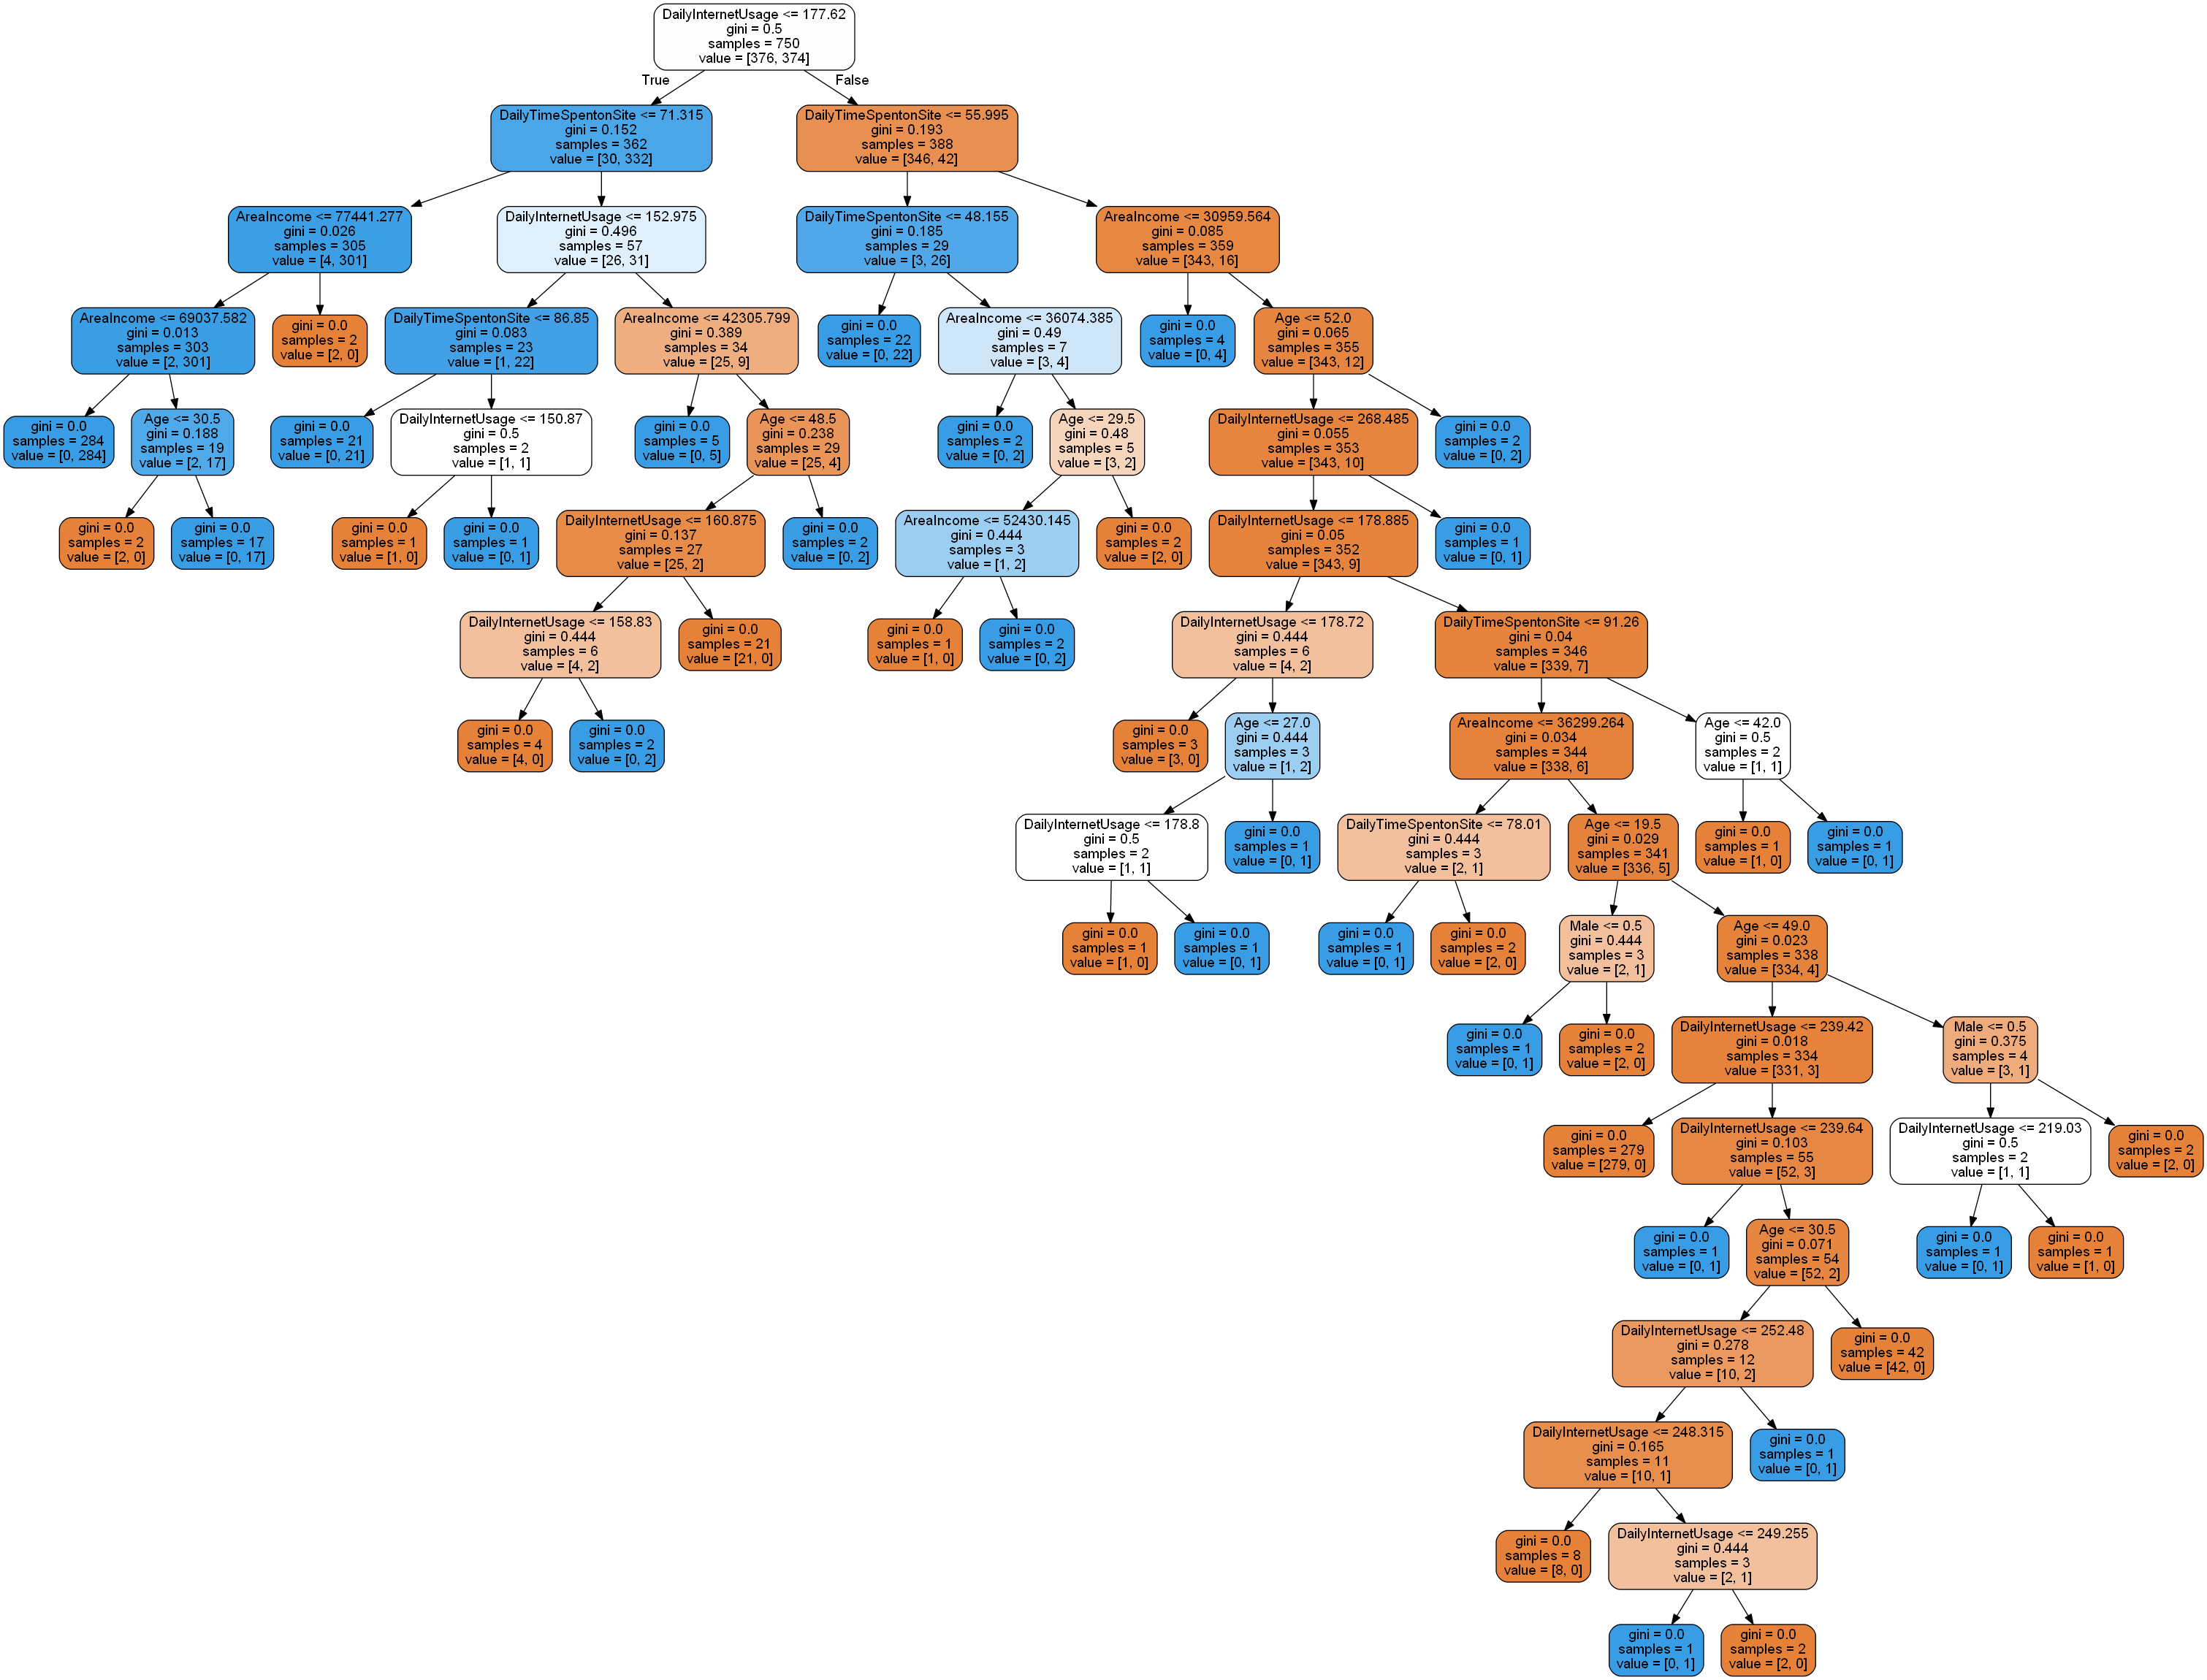

In [41]:
export_graphviz(dectreemodelclass, out_file=dot_data,feature_names=features,filled=True,rounded=True)
out_file = export_graphviz(
    dectreemodelclass,
    feature_names   = features,
#    class_names     = ['[y=0]', '[y=1]'],# Ascending numerical order
    filled          = True,
    rounded         = True
)
graph2 = pydotplus.graph_from_dot_data(out_file)
Image(graph2.create_png())